c:\Users\My\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


-25.277399052976993 8.401581224642797 -0.07277678580843636


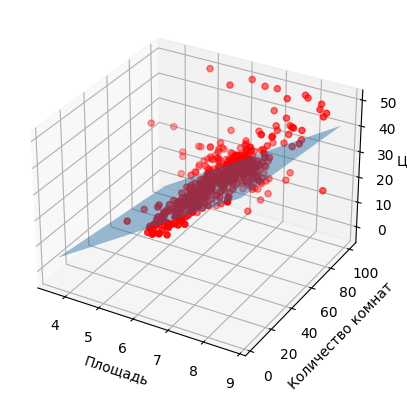

Text(0, 0.5, 'Цена')

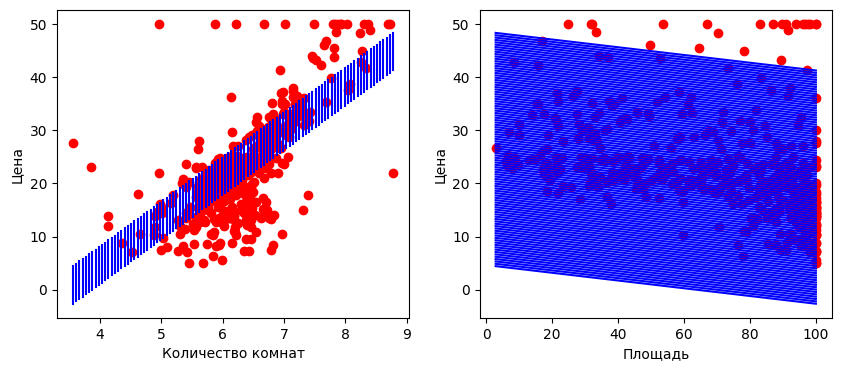

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', as_frame=False, parser='liac-arff')

X = boston.data[:, [5, 6]]  # используем только 2 признака - площадь и кол-во комнат
y = boston.target

# создаем модель линейной регрессии
model = LinearRegression()

# обучаем модель на данных
model.fit(X, y)

# получаем коэффициенты модели
b0 = model.intercept_
b1, b2 = model.coef_

# создаем сетку значений для построения плоскости решения
x1_grid, x2_grid = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 
                               np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
y_grid = b0 + b1*x1_grid + b2*x2_grid

print(b0, b1, b2)

# визуализируем плоскость решения
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red')
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)
ax.set_xlabel('Площадь')
ax.set_ylabel('Количество комнат')
ax.set_zlabel('Цена')
plt.show()

# строим первый график
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(X[:, 0], y, color='red')
ax[0].plot(x1_grid, y_grid, color='blue')
ax[0].set_xlabel('Количество комнат')
ax[0].set_ylabel('Цена')

# строим второй график
ax[1].scatter(X[:, 1], y, color='red')
ax[1].plot(x2_grid, y_grid, color='blue')
ax[1].set_xlabel('Площадь')
ax[1].set_ylabel('Цена')
